
# **Proyecto Final Data y Analytics**


## **OBJETIVO:**
#### Construir un modelo de Machine Learning a partir de los datos de calificación (rating) que se encuentran en la data proporcionada. Este modelo debe tener la capacidad de predecir la calificación que recibirá una empresa.

## **Actividades a desarrollar**
### a. Realizar las manipulaciones y tratamiento de los datos de manera que queden listos para la modelación.
### **Nota:** Tome en cuenta los valores perdidos y los valores outliers, o alguna transformación de las variables en caso de ser necesario.
### b. Hacer un análisis exploratorio de datos (EDA).
### c. Defina si usará modelos de Regresión o Clasificación con base en la información suministrada u otra información de la red que le ayude a determinar qué tipo de aprendizaje supervisado vaya a realizar. Dé una breve explicación.
### d. Realizar escenarios de modelos.
### **Nota:** tome en cuenta los siguientes modelos, el orden no es determinístico. Use como mínimo 5 modelos:
### -XGBoost
### -Random Forest
### -Gradient Boosting
### -Support Vector Machine
### -Naive Bayes
### -KNN
### -Regresión logística
### -Árbol de decisión
### -Extra tree decisión
### -Bagging
### -Regresión lineal.
### e. Con los modelos que ha seleccionado construya modelos de Regresión o Clasificación con base en la información suministrada.
### f. Evalué sus modelos según el tipo de modelo que usted haya elegido.
### **Nota:** Calcule las métricas necesarias dependiendo del tipo de modelo que haya elegido.
### g. Con el mejor modelo que haya salido de la evaluación aplique una modelación de hiper parámetro, luego vuelva a calcular nuevas métricas y compare los cambios con respecto a las métricas de evaluación del paso f.
### h.  Realice un análisis PCA para reducir el número de dimensiones del conjunto de datos. Luego vuelva a modelar un sistema (el que eligió en el punto f) y calcule nuevas métricas. Compare con las anteriores métricas.

### **A. Tratamiento de los datos**

In [ ]:
#Tratamiento de los datos
import numpy as np
import pandas as pd

#Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#No presentar advertencia
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [ ]:
#Cargamos los datos desde el repositorio de GitHub
csv_path = ('https://raw.githubusercontent.com/IVa8214/Proyecto-final/main/chocolate_ratings.csv')
df = pd.read_csv(csv_path, sep=',')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [ ]:
# En un primer momento revisamos la estructura de las variables y los datos perdidos 
df.info()
#Como podemos observar la variable con datos perdidos es la relativa a los ingredientes de los chocolates, la cual es de tipo objeto,
#es decir, cualitativa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [ ]:
# Revisamos la cantidad de columnas y datos
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",df.shape[0])
# Tenemos 2530 observaciones y 10 variables o columnas

La cantidad de columnas en los datos es:  10
La cantidad de filas en los datos es:  2530


In [ ]:
# Generamos una copia del dataframe
df1 = df.copy()
df1

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [ ]:
# Convertimos el porcentaje de cocoa a variable numérica tipo float
df1['Cocoa Percent'] = df1['Cocoa Percent'].str.rstrip("%").astype(float)
df1

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [ ]:
# Hacemos un resumen con la estadísticas descriptivas
df1[['Rating', 'Cocoa Percent']].describe(include="all").transpose() 
# Como podemos observar las variable categorica rating no necesariamente muestra un comportamiento continuo, mientras que la variable porcentaje
# de cocoa de la barra de chocolate fue cambiada a valor numérico. Los valores maximos del porcentaje de cocoa van del 42% al 100%, lo cual implica
# diferentes niveles de intensidad en el porcentaje de cacao

,count,mean,std,min,25%,50%,75%,max
Rating,2530.0,3.196344,0.445321,1.0,3.0,3.25,3.5,4.0
Cocoa Percent,2530.0,71.639723,5.616724,42.0,70.0,70.00,74.0,100.0


In [ ]:
# Generamos moda de los ingredientes
from statistics import mode
moda_ingredientes=mode(df1['Ingredients'])
moda_ingredientes

'3- B,S,C'

In [ ]:
# Integramos la moda en estado siniestro
df1['Ingredients']=df1['Ingredients'].fillna(moda_ingredientes)
df1.info()
# Incorporamos la moda a la variable ingredientes y, por tanto, ya no habria datos perdidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   float64
 7   Ingredients                       2530 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 197.8+ KB


In [ ]:
# Checamos valores duplicados de la base
df1.duplicated().sum()

0

## **B. Análisis Exploratorio de Datos (EDA)**

count    2530.00
mean       71.64
std         5.62
min        42.00
25%        70.00
50%        70.00
75%        74.00
max       100.00
Name: Cocoa Percent, dtype: float64

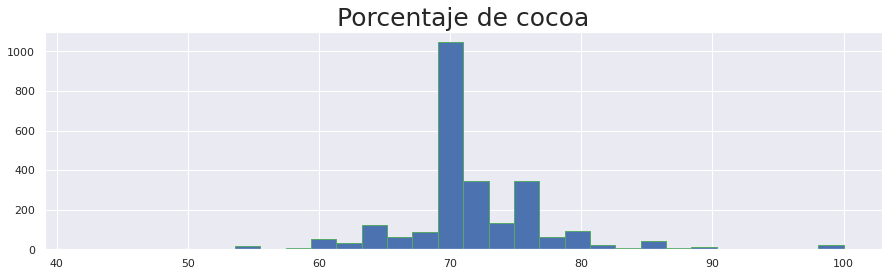

In [ ]:
# Histograma de cocoa
fig, ax = plt.subplots(figsize=(15,4))
df1["Cocoa Percent"].hist(bins=30, edgecolor="g")
ax.set_title("Porcentaje de cocoa", size=25)
df1["Cocoa Percent"].describe().round(2)
# Los porcentajes de cocoa reflejados en 100 pudieran tener caracteristicas de datos outliers; sin embargo, de acuerdo con mi criterio son datos
# ya asignados en las revisiones de expertos por lo que no se realizará algun tratamiento adicional

count    2530.00
mean        3.20
std         0.45
min         1.00
25%         3.00
50%         3.25
75%         3.50
max         4.00
Name: Rating, dtype: float64

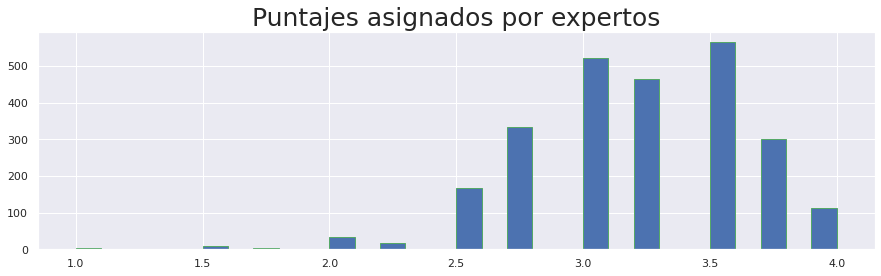

In [ ]:
# Histograma de rating 
fig, ax = plt.subplots(figsize=(15,4))
df1["Rating"].hist(bins=30, edgecolor="g")
ax.set_title("Puntajes asignados por expertos", size=25)
df1["Rating"].describe().round(2)
# La mayoria de los chocolates tienen una calificación satisfactoria 

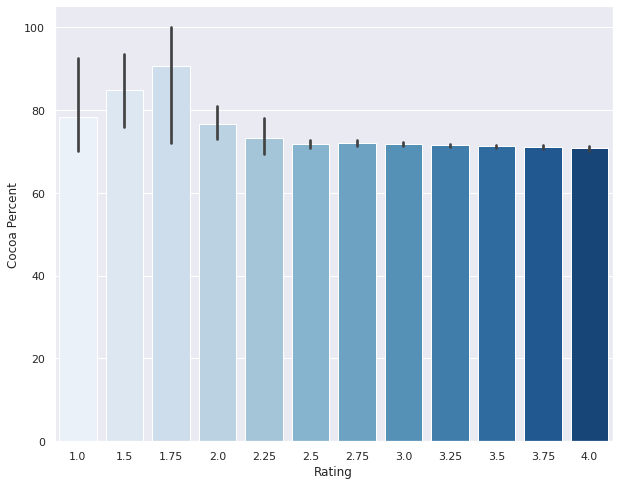

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Rating', y = 'Cocoa Percent', data=df1, palette='Blues')
# Los mayores porcentajes de pureza de chocolate asignado por los expertos, tienen una calificacion de desagradable a casi decepcionante. 
# Las calificaciones satisfactorio a premium tienen porcentaje de pureza por debajo del 80%. 

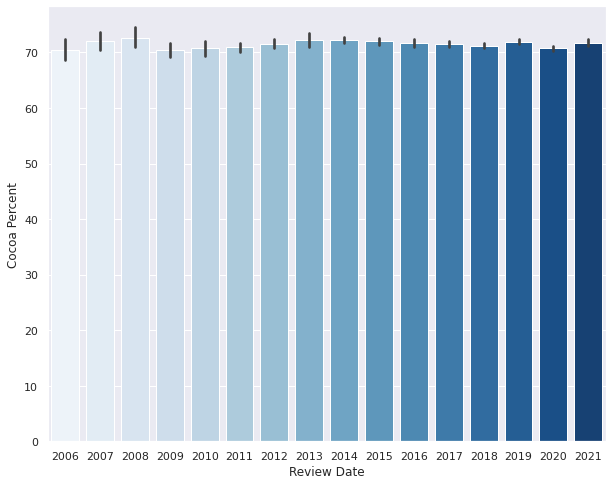

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Review Date', y = 'Cocoa Percent', data=df1, palette='Blues')
# En las fechas de publicación de la reseña, los porcentajes de pureza del chocolate es de 70%, solo 2007 y 2008
# rebasan ligeramente ese porcentaje 

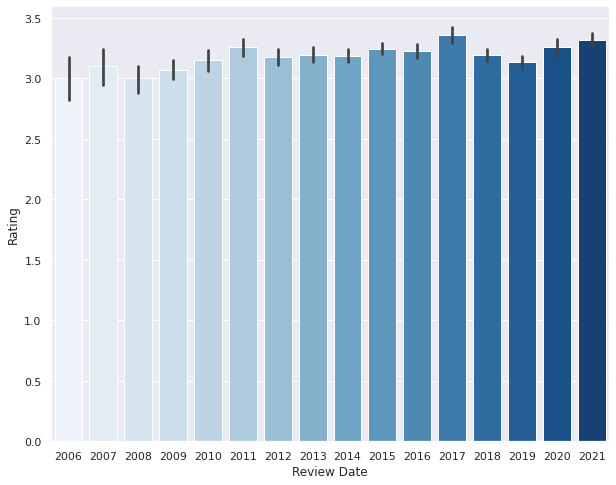

In [ ]:
# Checamos variables numericas contra categoricas 
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'Review Date', y = 'Rating', data=df1, palette='Blues')
# De 2006 a 2021, fechas de las reseñas de los chocolates, estos fueron calificados de manera satisfactoria. 

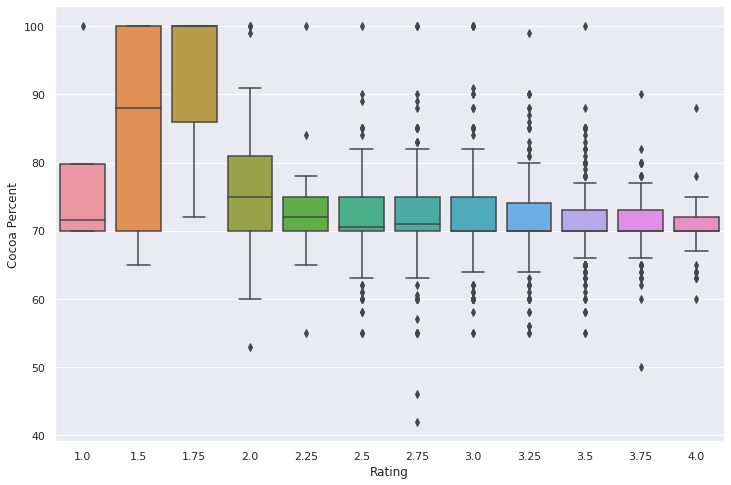

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Rating', y = 'Cocoa Percent', data = df1)
# Los datos outliers se concentran mas en las categorias decepcionante a premium, tanto para aquellos que presentan menores y mayores
# porcentajes de pureza. 

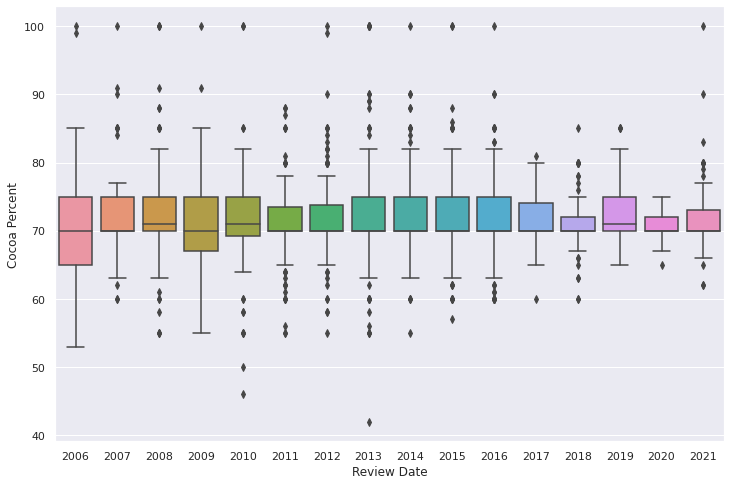

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Review Date', y = 'Cocoa Percent', data = df1)
# Los datos outliers para los porcentajes de pureza bajos y altos se concentran más de 2010 a 2016. 

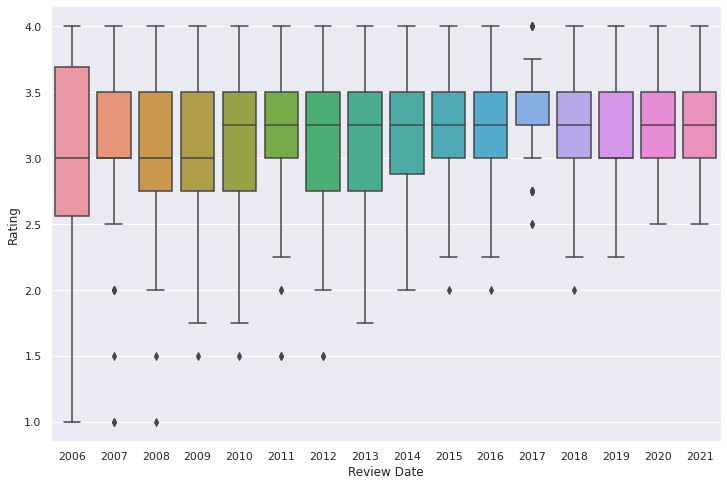

In [ ]:
# Checamos variables numericas contra categoricas 
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.boxplot(x = 'Review Date', y = 'Rating', data = df1)
# Los datos outliers son pocos y se concentran más de 2007 a 2017, y la mayoría de calificaciones en niveles decepcionante a satisfactorio

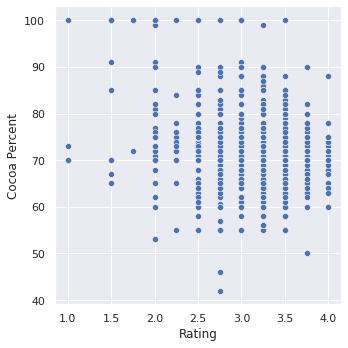

In [ ]:
# Se observa una correlacion negativa entre el porcentaje de pureza del chocolate y las calificaciones asignadas por los expertos
# La mayoria de las observaciones se concentran en calificaciones de decepcionante a premium. 
sns.set(style="darkgrid")
sns.relplot(x = "Rating", y = "Cocoa Percent", data = df1);

In [ ]:
# Matriz de correlación: se observa tambien una correlación negativa entre el porcentaje de pureza y la calificación otorgada
num_var = ["Rating",	"Cocoa Percent"]
df1[num_var].corr()

,Rating,Cocoa Percent
Rating,1.00000,-0.14669
Cocoa Percent,-0.14669,1.00000


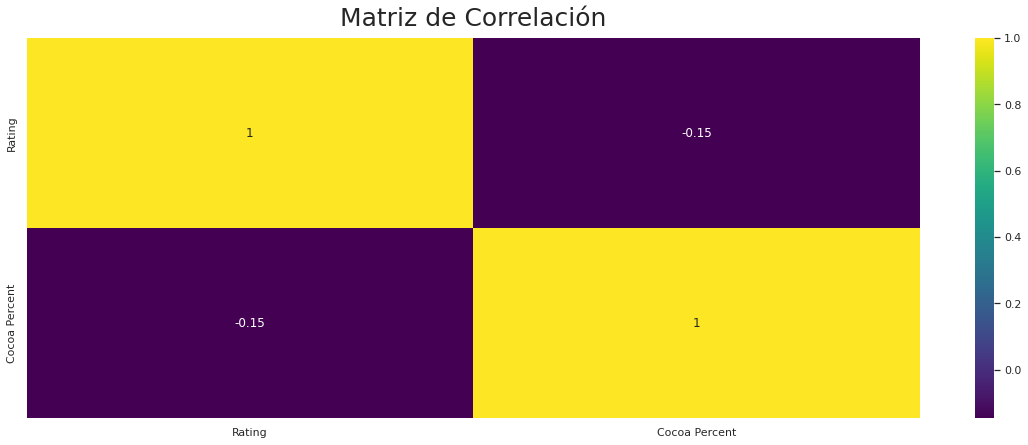

In [ ]:
# Mapa de calor: en el mapa de calor se observa el mismo nivel de correlación que en la matriz de correlaciones
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df1[num_var].corr(),cmap='viridis',annot=True)
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

## **C. Regresión o Clasificación**

#### Desde mi punto de vista y las características de la información que se proporciona en la base de datos, creo que se puede utilizar los dos tipos de aprendizaje supervisado. La primera razón porque a partir de la regresión se puede modelar la relación entre el puntaje (rating) y el porcentaje de pureza del chocolate; sin embargo, también la pureza de los chocolate se puede clasificar en una categoría binaria la cual no existe, y habría que crearla. Se utilizarán regresión y clasificación, pero para este último el Rating lo volveriamos variable binaria. Sin embargo, probablemente se utilice regresión para realizar el hiperparametro, dada la estructura de los datos de la base.  

## **C. Escenario de Modelos**



In [ ]:
# 1.- Modelos de regresión 
# Definimos nuevo dataframe 
df2=pd.DataFrame(data=df1, columns=['REF', 'Review Date', 'Rating', 'Cocoa Percent'])
df2.rename(columns = {'Review Date':'Date'}, inplace = True)
df2

,REF,Date,Rating,Cocoa Percent
0,2454,2019,3.25,76.0
1,2458,2019,3.50,76.0
2,2454,2019,3.75,76.0
3,2542,2021,3.00,68.0
4,2546,2021,3.00,72.0
...,...,...,...,...
2525,1205,2014,2.75,80.0
2526,1996,2017,3.75,75.0
2527,2036,2018,3.00,75.0
2528,2170,2018,3.25,70.0


In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY para la fecha de revisión 
d_date = pd.get_dummies(df2.Date, prefix='date_d')
d_date = d_date.astype(int)
print(d_date.head())

   date_d_2006  date_d_2007  date_d_2008  date_d_2009  date_d_2010  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   date_d_2011  date_d_2012  date_d_2013  date_d_2014  date_d_2015  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   date_d_2016  date_d_2017  date_d_2018  date_d_2019  date_d_2020  \
0            0            0            0            1            0   
1            0    

In [ ]:
df2 = pd.merge(df2, d_date, left_index=True, right_index=True)
df2

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,3.25,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,3.50,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,3.75,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,3.00,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,3.00,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,2.75,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2526,1996,2017,3.75,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2527,2036,2018,3.00,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2528,2170,2018,3.25,70.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Definimos las variables a utilizar y el target (Rating)
X = df2.drop(["Rating"], axis=1)
y = df2["Rating"] #Target o objetivo

In [ ]:
# Estructura de la variable dependiente 
X.head()

,REF,Date,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Forma de la variable dependiente: 2530 observaciones y 1 columna o variable
X.shape

(2530, 19)

In [ ]:
# Estructura de la variable independiente
y.head()

0    3.25
1    3.50
2    3.75
3    3.00
4    3.00
Name: Rating, dtype: float64

In [ ]:
# Dividimos los datos para el conjunto de prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [ ]:
# CLasificación de los datos de prueba y entrenamiento 
print("Datos originales",X.shape)
print("Datos para el entrenamiento",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Datos originales (2530, 19)
Datos para el entrenamiento (2024, 19)
Datos para prueba (506, 19)
(2024,)
(506,)


In [ ]:
# Estructura de la variable dependiente de entrenamiento
X_train.head()

,REF,Date,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
1312,576,2010,75.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1786,1415,2014,70.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1984,1061,2013,75.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
179,331,2009,77.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1397,1097,2013,72.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Escalado de datos (opcional)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

In [ ]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
# Llamar al objeto o función 
lin_reg = LinearRegression()
#Entrenamos el modelo
regressor = lin_reg.fit(X_train, y_train)
# Hacemos de predicciones del modelo con el conjunto de prueba (Test)
y_pred_lr = regressor.predict(X_test)

In [ ]:
# Predicción de rating 
y_pred_lr[0:9]

array([3.19286553, 3.33349053, 3.14452569, 3.2172796 , 3.14403741,
       3.02294366, 3.29833428, 3.3891546 , 3.23583428])

In [ ]:
# Listado de observaciones de la variable rating de prueba 
list(y_test[0:9])

[2.5, 3.25, 3.0, 2.75, 3.0, 3.5, 2.75, 3.0, 2.5]

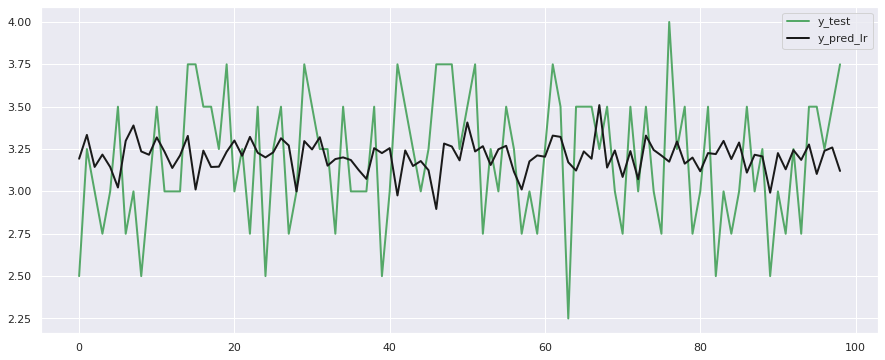

In [ ]:
# Graficamos 
plt.figure(figsize=(15, 6))
#plt.scatter(list(X_train), list(y_train), c="k", label="training samples")
plt.plot(list(y_test[0:99]),  c="g", label="y_test", linewidth=2)
plt.plot(y_pred_lr[0:99], c="k", label="y_pred_lr", linewidth=2)
plt.legend(loc='best')
plt.show();

In [ ]:
# Regresión lineal métricas 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_lr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_lr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'% r2_score(y_test, y_pred_lr))

Mean Absolute Error: 0.3388266582262846
Mean Squared Error: 0.18400443679948222
Root Mean Squared Error: 0.4289573834304315
Coeficiente de determinación: 0.02


In [ ]:
# KNN Regresión 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#llamo al objeto o a la función 
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo 
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

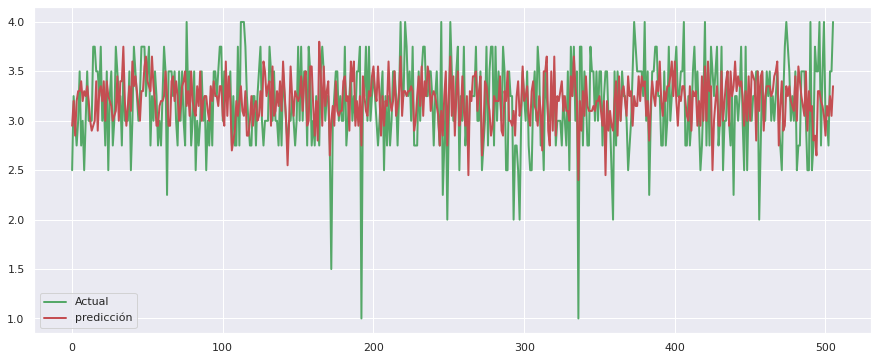

In [ ]:
# Gráfico predicción-real
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn[0:1000], c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

In [ ]:
# KNN métricas 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_knn))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_knn))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_knn))

Mean Absolute Error: 0.3425889328063241
Mean Squared Error: 0.1872776679841897
Root Mean Squared Error: 0.4327558988438976
Coefficient of determination: 0.00


In [ ]:
# SVM regresión 
from sklearn import svm
svm_reg = svm.SVR()
# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)
# Haciendo la predicciones
y_pred_svr = regressor.predict(X_test)

In [ ]:
# SVM métricas
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_svr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_svr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_svr))

Mean Absolute Error: 0.33589151029526726
Mean Squared Error: 0.18169500972375155
Root Mean Squared Error: 0.4262569761584572
Coefficient of determination: 0.03


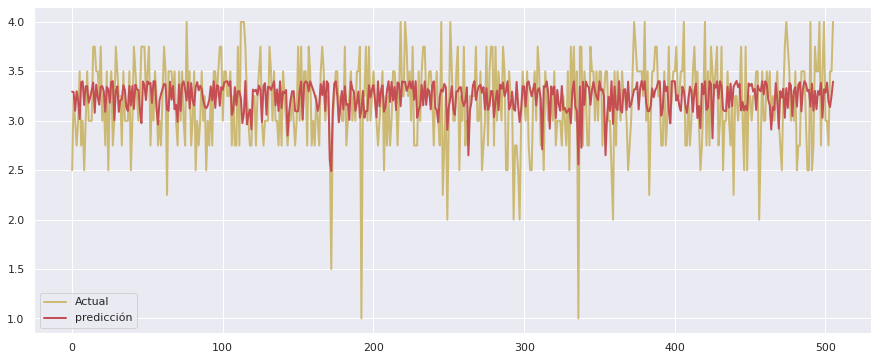

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_svr, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

In [ ]:
# Árboles de decisión regresión 
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = 10,
                                     min_samples_leaf = 10
                                     )
dtr = dec_tree_reg.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [ ]:
# Árboles de decisión métricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_dtr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_dtr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_dtr))

Mean Absolute Error: 0.3377986498726728
Mean Squared Error: 0.17989429685453653
Root Mean Squared Error: 0.4241394780665159
Coefficient of determination: 0.04


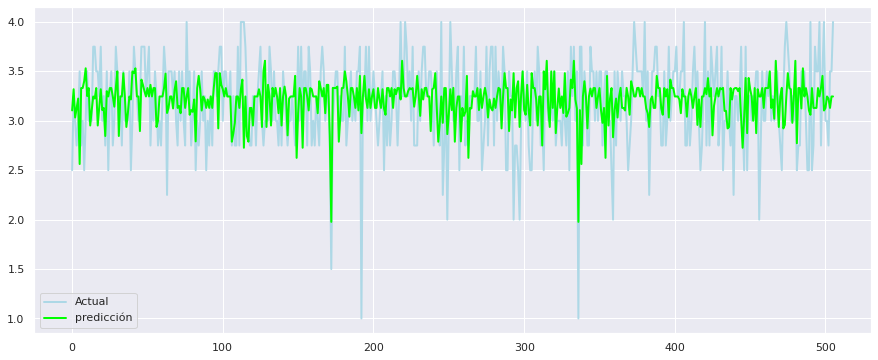

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_dtr[0:1000], c="lime", label="predicción", linewidth=2)

plt.legend(loc='best')
plt.show();

In [ ]:
# Bosque aleatorio regresión 
from sklearn.ensemble import RandomForestRegressor
#cargamos la función 
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)#500 árboles
#Entrenamos el modelo
regressor = rf_reg.fit(X_train, y_train)
#Hacemos las predicciones
y_pred_rf = regressor.predict(X_test)

In [ ]:
# Bosque aleatorio métricas
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_rf))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_rf))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.35369863570772664
Mean Squared Error: 0.19755848914189675
Root Mean Squared Error: 0.44447552142035535
Coefficient of determination: -0.05


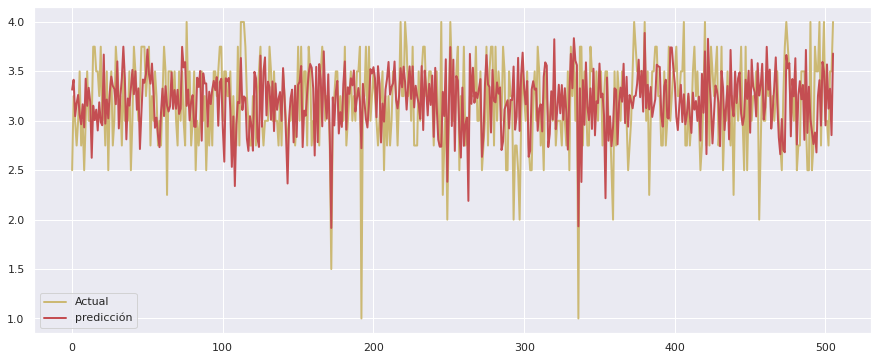

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

In [ ]:
# Comparación de modelos
import pandas as pd
modelos = pd.DataFrame({
    'Model': ["Regresión Lineal","KNN", "Random Forest","SVR", "Arbol Decisión"] ,
     "R2":[r2_score(y_test, y_pred_lr)*100 ,r2_score(y_test, y_pred_knn)*100 ,r2_score(y_test, y_pred_rf)*100,
           r2_score(y_test, y_pred_svr)*100, r2_score(y_test, y_pred_dtr)*100],
     "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)) ,np.sqrt(mean_squared_error(y_test, y_pred_knn))
                   ,np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_svr)),
              np.sqrt(mean_squared_error(y_test, y_pred_dtr))]   })

modelos
# El menor error cuadratico medio es el de arboles de decisión, por lo que tiene mejor capacidad predictiva 

,Model,R2,RMSE
0,Regresión Lineal,1.858295,0.428957
1,KNN,0.112465,0.432756
2,Random Forest,-5.370975,0.444476
3,SVR,3.090065,0.426257
4,Arbol Decisión,4.050504,0.424139


In [ ]:
# 2.- Modelos de clasificación 
# Para los modelos de clasificación las calificaciones se pueden recodificar en variables binarias chocolates de mala calidad igual a 0 y
# de buena calidad igual a 1
# Definimos nuevo dataframe 
df3=df2.copy()
df3

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,3.25,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,3.50,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,3.75,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,3.00,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,3.00,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,2.75,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2526,1996,2017,3.75,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2527,2036,2018,3.00,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2528,2170,2018,3.25,70.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Recodificamos el rating  
def rate(Rating):
  if Rating == 1:
    return 0
  elif Rating == 1.5:
    return 0
  elif Rating == 1.75:
    return 0
  elif Rating == 2:
    return 0
  elif Rating == 2.25:
    return 0
  elif Rating == 2.5:
    return 0
  elif Rating == 2.75:
    return 0
  elif Rating == 3:
    return 1
  elif Rating == 3.25:
    return 1
  elif Rating == 3.5:
    return 1
  elif Rating == 3.75:
    return 1
  elif Rating == 4:
    return 1
df3['Rating']=df3['Rating'].apply(lambda x: rate(x))
df3

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,1,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,1,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,1,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,1,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,0,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2526,1996,2017,1,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2527,2036,2018,1,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2528,2170,2018,1,70.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Identificando la variables independente y el target
X = df3.drop(['Rating'], axis=1)
Y = df3['Rating'].values

In [ ]:
#Segmentación del dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [ ]:
#Transformación de datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# SVC Clasificador
#Entrenado el SVC
from sklearn import svm
# Llamamos al objeto
svm_clf = svm.SVC()
# Entrenamos al modelo
classifier = svm_clf.fit(X_train, Y_train)
# Haciendo predicciones con el conjunto de prueba
y_pred_svm = classifier.predict(X_test)

In [ ]:
#Accuracy
from sklearn.metrics import confusion_matrix, classification_report
clf =print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.78      1.00      0.87       393

    accuracy                           0.78       506
   macro avg       0.39      0.50      0.44       506
weighted avg       0.60      0.78      0.68       506



In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc_svm=accuracy_score(Y_test,y_pred_svm)
print(f"Accuracy Score de SVM es : {acc_svm}")

Accuracy Score de SVM es : 0.7766798418972332


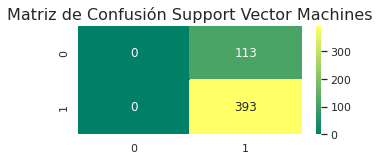

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Support Vector Machines", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot = True, cmap ='summer',fmt = '.0f')
    
plt.show();

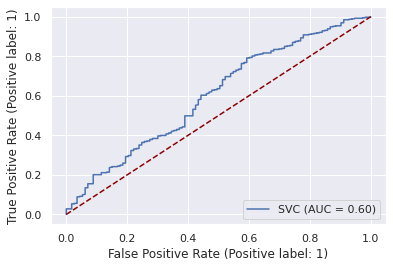

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm_clf , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Random forest clasificador 
from sklearn.ensemble import RandomForestClassifier
# Llamando al objeto clasificador
rfc=RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=-1)
# Entrenamiento del modelo
rfc.fit(X_train,Y_train)
# Haciendo predicciones
y_pred_rf=rfc.predict(X_test)

In [ ]:
#Accuracy
clf =print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       113
           1       0.81      0.83      0.82       393

    accuracy                           0.72       506
   macro avg       0.58      0.57      0.57       506
weighted avg       0.71      0.72      0.71       506



In [ ]:
#Matriz de confusión
acc_rfc= accuracy_score(Y_test,y_pred_rf)
print(f"Accuracy Score de Random Forest es : {acc_rfc}")

Accuracy Score de Random Forest es : 0.717391304347826


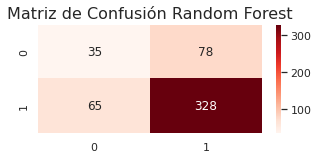

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Random Forest", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

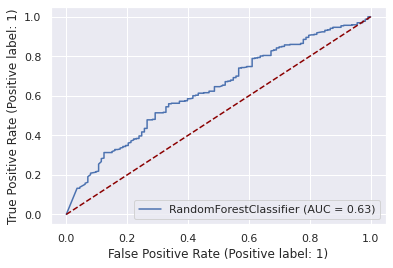

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Regresión logistica
from sklearn.linear_model import LogisticRegression
# Llamamos al objeto
reg = LogisticRegression()
# Entrenamos al modelos
reg.fit(X_train,Y_train)
# Haciendo predicciones
y_pred_reg=reg.predict(X_test)

In [ ]:
#Métricas de validación
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
acc_reg = accuracy_score(Y_test, y_pred_reg)
print("Classificación de Reporte:\n",classification_report(Y_test,y_pred_reg))

Classificación de Reporte:
               precision    recall  f1-score   support

           0       0.75      0.03      0.05       113
           1       0.78      1.00      0.88       393

    accuracy                           0.78       506
   macro avg       0.77      0.51      0.46       506
weighted avg       0.77      0.78      0.69       506



In [ ]:
#Accuracy
acc_reg = accuracy_score(Y_test, y_pred_reg)
print(f"Accuracy Score de la Regresión logística : {acc_reg}")

Accuracy Score de la Regresión logística : 0.7806324110671937


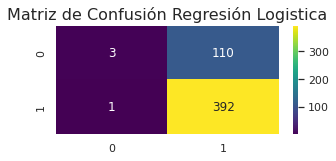

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(Y_test,y_pred_reg), annot = True, cmap = 'viridis',fmt = '.0f')
plt.show();

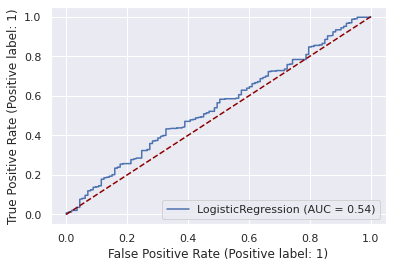

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(reg , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Arbol de decisión clasificador 
#Implementando el modelo
from sklearn.tree import DecisionTreeClassifier
# Llamamo al objeto clasificador
dtree = DecisionTreeClassifier(max_depth=2, random_state=123, criterion='entropy')
# Entrenamos el modelo
dtree.fit(X_train,Y_train)
# Hacemos predicciones
y_pred_dt=dtree.predict(X_test)

In [ ]:
#Accuracy
clf =print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05       113
           1       0.78      0.99      0.87       393

    accuracy                           0.78       506
   macro avg       0.64      0.51      0.46       506
weighted avg       0.72      0.78      0.69       506



In [ ]:
#Matriz de confusión
acc_dt=accuracy_score(Y_test,y_pred_dt)
print(f"Accuracy Score de Decision Tree es : {acc_dt}")

Accuracy Score de Decision Tree es : 0.7766798418972332


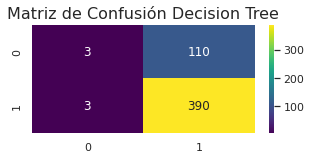

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Decision Tree", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot = True, cmap = 'viridis',fmt = '.0f') 
plt.show();

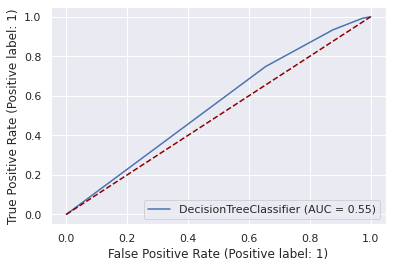

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtree , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Adaboost clasificador 
from sklearn.ensemble import AdaBoostClassifier
# Llamamo al objeto clasificador
adb = AdaBoostClassifier(base_estimator = None)
# Entrenamos al modelo
adb.fit(X_train,Y_train)
# Hacemos predicciones
y_pred_adb=adb.predict(X_test)

In [ ]:
#Métricas de precisión
clf =print(classification_report(Y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.45      0.04      0.08       113
           1       0.78      0.98      0.87       393

    accuracy                           0.77       506
   macro avg       0.62      0.51      0.48       506
weighted avg       0.71      0.77      0.69       506



In [ ]:
acc_adb = accuracy_score(Y_test,y_pred_adb)
print(f"Accuracy Score de AdaBoost es :{acc_adb}")

Accuracy Score de AdaBoost es :0.7747035573122529


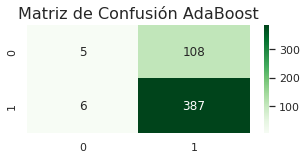

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión AdaBoost", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_adb), annot = True, cmap ='Greens',fmt = '.0f')
plt.show();

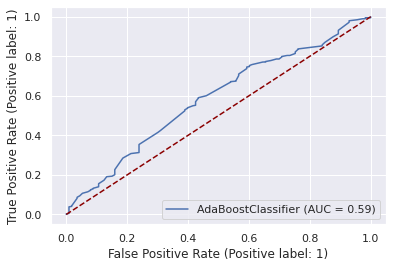

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Gradient boosting clasificador 
from sklearn.ensemble import GradientBoostingClassifier
# Llamamos al clasificador
gbc=GradientBoostingClassifier()
# Entrenamos al modelo
gbc.fit(X_train,Y_train)
# Hacemos predicciones
y_pred_gbc=gbc.predict(X_test)

In [ ]:
#Resultados
clf =print(classification_report(Y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.50      0.08      0.14       113
           1       0.79      0.98      0.87       393

    accuracy                           0.78       506
   macro avg       0.64      0.53      0.50       506
weighted avg       0.72      0.78      0.71       506



In [ ]:
acc_gbc = accuracy_score(Y_test,y_pred_gbc)
print(f"Accuracy Score de GradientBoosting es :{acc_gbc}")

Accuracy Score de GradientBoosting es :0.7766798418972332


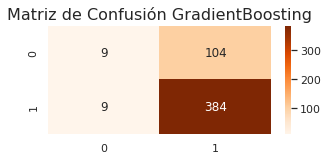

In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión GradientBoosting", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_gbc), annot = True, cmap ='Oranges',fmt = '.0f')
plt.show();

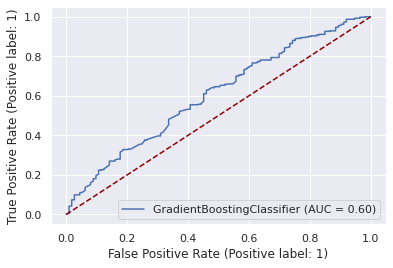

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# XGBoost clasificador 
from xgboost import XGBClassifier
# Llamamos al clasificar
xgb =XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Entrenamos al Modelo
xgb.fit(X_train, Y_train)
# Haciendo predicciones
y_pred_xgb=xgb.predict(X_test)

In [ ]:
#Resultado
clf =print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.78      1.00      0.87       393

    accuracy                           0.78       506
   macro avg       0.39      0.50      0.44       506
weighted avg       0.60      0.78      0.68       506



In [ ]:
#Accuracy
acc_xgb = accuracy_score(Y_test,y_pred_xgb)
print(f"Accuracy Score de XGB es :{acc_xgb}")

Accuracy Score de XGB es :0.7766798418972332


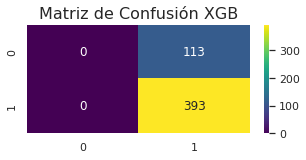

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión XGB", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_xgb), annot = True, cmap = 'viridis',fmt = '.0f') 
plt.show();

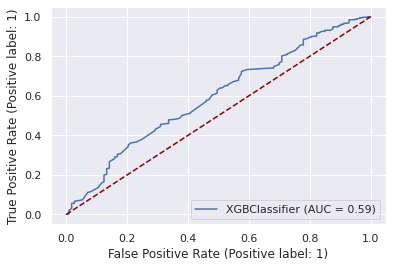

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Extra trees clasificador 
from sklearn.ensemble import ExtraTreesClassifier
# Llamamos la objeto clasificador
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
# Entrenamos al modelo
etc.fit(X_train,Y_train)
# Haciendo predicciones
y_pred_ex=etc.predict(X_test)

In [ ]:
#Resultados
clf =print(classification_report(Y_test, y_pred_ex))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35       113
           1       0.81      0.80      0.81       393

    accuracy                           0.70       506
   macro avg       0.58      0.58      0.58       506
weighted avg       0.71      0.70      0.70       506



In [ ]:
#Accuracy
acc_etc = accuracy_score(Y_test,y_pred_ex)
print(f"Accuracy Score de Extra Trees es :{acc_etc}")

Accuracy Score de Extra Trees es :0.7015810276679841


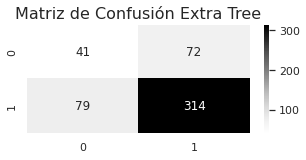

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Extra Tree", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_ex), annot = True, cmap ='Greys',fmt = '.0f')  
plt.show();

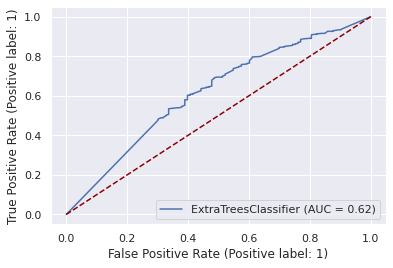

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(etc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
# Bagging clasificador 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
# Llamamos al objeto clasificador
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
# Entrenamos al modelo
bag.fit(X_train, Y_train)
# Hacemos predicciones
y_pred_bag=bag.predict(X_test)

In [ ]:
#Resultados
baggin =print(classification_report(Y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32       113
           1       0.81      0.81      0.81       393

    accuracy                           0.70       506
   macro avg       0.57      0.57      0.57       506
weighted avg       0.70      0.70      0.70       506



In [ ]:
#Accuracy
acc_bag = accuracy_score(Y_test,y_pred_bag)
print(f"Accuracy Score de Bagging es :{acc_etc}")

Accuracy Score de Bagging es :0.7015810276679841


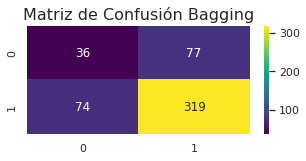

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Bagging", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_bag), annot = True, cmap = 'viridis',fmt = '.0f')
plt.show();

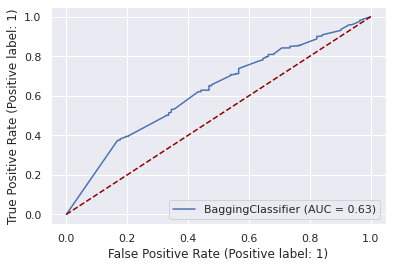

In [ ]:
#Curva ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(bag , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
#Ranking de Accuracy
models = pd.DataFrame({
    'Model': ['Regresión logistica','Decision Tree',"Support Vector",'Random Forest',"AdaBoost",
              'Gradient Boosting','XGB',"Extra tree","Bagging"],
              'Accuracy': [acc_reg,  acc_dt,acc_svm, acc_rfc, acc_adb, acc_gbc, acc_xgb, 
             acc_etc, acc_bag ]})
models.sort_values(by='Accuracy', ascending=False)
# Dada la recodificación realizada a la variable objetivo, desde mi punto de vista se realizará el hiperparametro para regresión

,Model,Accuracy
0,Regresión logistica,0.780632
1,Decision Tree,0.776680
2,Support Vector,0.776680
5,Gradient Boosting,0.776680
6,XGB,0.776680
4,AdaBoost,0.774704
3,Random Forest,0.717391
7,Extra tree,0.701581
8,Bagging,0.701581


In [ ]:
#Visualizando el mejor modelo
import plotly.express as px
fig = px.bar (models, x="Model", 
                   y="Accuracy", 
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'], 
                   title='Accuracy de los Modelos')
fig.update_layout(bargap=0.6)
fig.show()

## **D. Hiperparametro de regresión**

In [ ]:
# Definimos nuevo dataframe 
df4=df2.copy()
df4

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,3.25,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,3.50,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,3.75,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,3.00,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,3.00,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,2.75,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2526,1996,2017,3.75,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2527,2036,2018,3.00,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2528,2170,2018,3.25,70.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
# normalizamos los datos
target_name ="Rating"
robust_scaler = RobustScaler()
# Dividimos los datos en etiquetas
X = df4.drop("Rating", axis=1)
feature_names = X.columns
X = robust_scaler.fit_transform(X)
y = df4[target_name]
# Dividimos los datos en entrenamiento y en datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search = {
    'max_depth': [80, 90],
    'max_features': [1, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'criterion': ['mse', "r2"]       } 
clf2 = DecisionTreeRegressor(random_state=123)
model = GridSearchCV(estimator = clf2, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf))
print('Best Parameters : ',model.best_params_)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Testing R2 Score:  -6.5043262730632545
Testing RMSE:  0.44824898758291054
Testing MAE:  0.3542148699801982
Testing MSE:  0.2009271548691043
Best Parameters :  {'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}


## **E. Análisis PCA**

In [ ]:
# Definimos nuevo dataframe para el PCA
df5=df2.copy()
df5

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,2454,2019,3.25,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2458,2019,3.50,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2454,2019,3.75,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2542,2021,3.00,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546,2021,3.00,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,2.75,80.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2526,1996,2017,3.75,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2527,2036,2018,3.00,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2528,2170,2018,3.25,70.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Feature Variables
X = df5.drop('Rating',axis=1)
#Target Variable
Y = df5['Rating']

In [ ]:
# Partición de los Datos
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=353)
print("Entrenamineto", x_train.shape)
print("Prueba x_test", x_test.shape)
print("Entrenamiento y_train",y_train.shape)
print("Prueba y_test",y_test.shape)

Entrenamineto (2024, 19)
Prueba x_test (506, 19)
Entrenamiento y_train (2024,)
Prueba y_test (506,)


In [ ]:
# Diseñamos la parte de preprocesamiento de datos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
# Datos de entrenamiento y testeo
x_train_sc=pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

In [ ]:
# Checamos datos escalados con el nuevo dataframe con dummies
x_train_sc.head()

,REF,Date,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017,date_d_2018,date_d_2019,date_d_2020,date_d_2021
0,0.081349,0.153721,-1.376977,-0.150794,-0.182154,-0.194804,-0.233915,-0.215721,-0.261988,-0.281898,-0.274685,-0.326521,2.856286,-0.304750,-0.206788,-0.318115,-0.291984,-0.17023,-0.283935
1,-0.581328,-0.595390,-0.302954,-0.150794,-0.182154,-0.194804,-0.233915,-0.215721,-0.261988,3.547378,-0.274685,-0.326521,-0.350105,-0.304750,-0.206788,-0.318115,-0.291984,-0.17023,-0.283935
2,0.434254,0.403424,-2.092993,-0.150794,-0.182154,-0.194804,-0.233915,-0.215721,-0.261988,-0.281898,-0.274685,-0.326521,-0.350105,3.281378,-0.206788,-0.318115,-0.291984,-0.17023,-0.283935
3,-1.318507,-1.344500,0.592066,-0.150794,-0.182154,-0.194804,4.275066,-0.215721,-0.261988,-0.281898,-0.274685,-0.326521,-0.350105,-0.304750,-0.206788,-0.318115,-0.291984,-0.17023,-0.283935
4,-1.773363,-2.093611,-1.376977,6.631574,-0.182154,-0.194804,-0.233915,-0.215721,-0.261988,-0.281898,-0.274685,-0.326521,-0.350105,-0.304750,-0.206788,-0.318115,-0.291984,-0.17023,-0.283935


In [ ]:
# Aplicando PCA PARA REDUCCIÓN DE DIMENSIONALIDAD
# Llamar al modelo n_componets=None
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train_sc)
x_test = pca.transform(x_test_sc)

In [ ]:
pca.explained_variance_

array([3.05552983e+00, 1.18172958e+00, 1.11712433e+00, 1.10033724e+00,
       1.09442581e+00, 1.09088074e+00, 1.08402617e+00, 1.07817162e+00,
       1.06496051e+00, 1.06307289e+00, 1.05011535e+00, 1.04626202e+00,
       1.03632358e+00, 1.03337356e+00, 1.02901924e+00, 8.80222595e-01,
       3.81692712e-03, 7.18534756e-32, 5.65740778e-32])

In [ ]:
pca.explained_variance_ratio_

array([1.60737904e-01, 6.21655642e-02, 5.87669678e-02, 5.78838736e-02,
       5.75728993e-02, 5.73864086e-02, 5.70258204e-02, 5.67178380e-02,
       5.60228600e-02, 5.59235610e-02, 5.52419223e-02, 5.50392151e-02,
       5.45163982e-02, 5.43612106e-02, 5.41321489e-02, 4.63046159e-02,
       2.00791647e-04, 3.77989341e-33, 2.97611190e-33])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.60737904e-01 6.21655642e-02 5.87669678e-02 5.78838736e-02
 5.75728993e-02 5.73864086e-02 5.70258204e-02 5.67178380e-02
 5.60228600e-02 5.59235610e-02 5.52419223e-02 5.50392151e-02
 5.45163982e-02 5.43612106e-02 5.41321489e-02 4.63046159e-02
 2.00791647e-04 3.77989341e-33 2.97611190e-33]


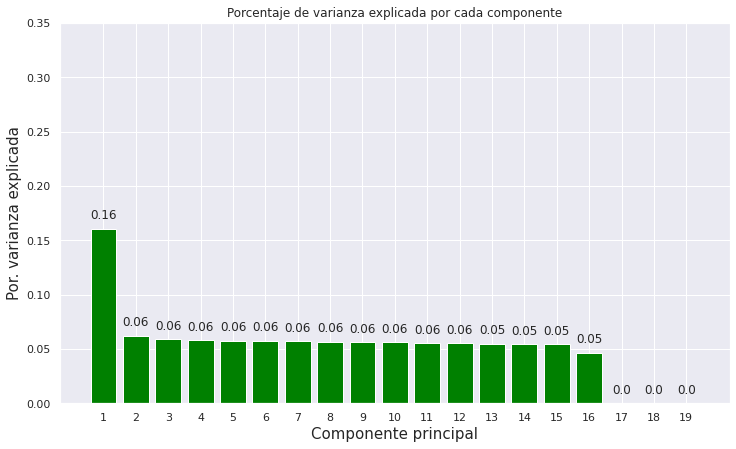

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.bar(x  = np.arange(pca.n_components_) + 1,color="green", 
    height = pca.explained_variance_ratio_,)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 0.35)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza explicada', size=15);
fig.show()
# Si nos quedaramos con aquellos componentes que al menos explican el 5% de la varianza para el caso de las numericas el corte se haría hasta el componente
# principal 15, el resto de los componentes se retiraria. Obviamente en una segunda etapa de iteración podrian quitarse el resto de los 
# componentes

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.1607379  0.22290347 0.28167044 0.33955431 0.39712721 0.45451362
 0.51153944 0.56825728 0.62428014 0.6802037  0.73544562 0.79048483
 0.84500123 0.89936244 0.95349459 0.99979921 1.         1.
 1.        ]


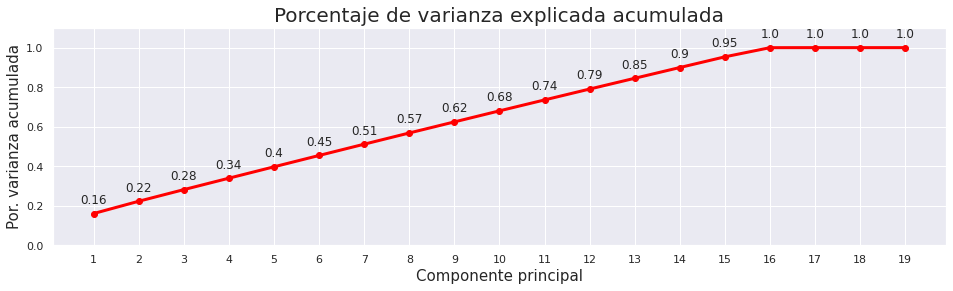

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.plot(np.arange(len(X.columns)) + 1, 
    prop_varianza_acum, marker = 'o', lw=3, color="red")

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,(x,y),
        textcoords="offset points",
        xytext=(0,10),ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada', size=20)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza acumulada', size=15);   
# Con esos 15 componentes estariamos perdiendo aproximadamente un 5% de varianza explicada del total de variables numericas consideradas

In [ ]:
# Seleccionamos 15 caracteristicas
pca = PCA(n_components = 15)
x_train = pca.fit_transform(x_train_sc)
x_test = pca.transform(x_test_sc)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.1607379  0.06216556 0.05876697 0.05788387 0.0575729  0.05738641
 0.05702582 0.05671784 0.05602286 0.05592356 0.05524192 0.05503922
 0.0545164  0.05436121 0.05413215]


In [ ]:
# Total de varianza explicada para el modelo de 15 componentes
pca.explained_variance_ratio_.sum()

0.9534945924194566

In [ ]:
df6=df2.copy()
del df6['date_d_2018']
del df6['date_d_2019']
del df6['date_d_2020']
del df6['date_d_2021']
df6

,REF,Date,Rating,Cocoa Percent,date_d_2006,date_d_2007,date_d_2008,date_d_2009,date_d_2010,date_d_2011,date_d_2012,date_d_2013,date_d_2014,date_d_2015,date_d_2016,date_d_2017
0,2454,2019,3.25,76.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2458,2019,3.50,76.0,0,0,0,0,0,0,0,0,0,0,0,0
2,2454,2019,3.75,76.0,0,0,0,0,0,0,0,0,0,0,0,0
3,2542,2021,3.00,68.0,0,0,0,0,0,0,0,0,0,0,0,0
4,2546,2021,3.00,72.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,2014,2.75,80.0,0,0,0,0,0,0,0,0,1,0,0,0
2526,1996,2017,3.75,75.0,0,0,0,0,0,0,0,0,0,0,0,1
2527,2036,2018,3.00,75.0,0,0,0,0,0,0,0,0,0,0,0,0
2528,2170,2018,3.25,70.0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
# normalizamos los datos
target_name ="Rating"
robust_scaler = RobustScaler()
# Dividimos los datos en etiquetas
X = df6.drop("Rating", axis=1)
feature_names = X.columns
X = robust_scaler.fit_transform(X)
y = df6[target_name]
# Dividimos los datos en entrenamiento y en datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search = {
    'max_depth': [80, 90],
    'max_features': [1, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'criterion': ['mse', "r2"]       } 
clf3 = DecisionTreeRegressor(random_state=123)
model = GridSearchCV(estimator = clf3, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf))
print('Best Parameters : ',model.best_params_)
# El RMSE obtenido reduciendo la dimensionalidad de la base no es menor a los obtenidos anteriormente: RMSE 1: 0.424139  y RMSE 2: 0.44824898758291054
# Desde mi punto de vista el primer modelo de arboles de decisión sigue teniendo mejor capacidad predictiva. 

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Testing R2 Score:  -12.750304379083332
Testing RMSE:  0.46120558109392246
Testing MAE:  0.36621397887038176
Testing MSE:  0.21271058803218268
Best Parameters :  {'criterion': 'mse', 'max_depth': 80, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 10}


## **¡Muchas Gracias!**